In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('beer.csv')

In [12]:
df

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
4,4,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0
...,...,...,...,...,...,...,...,...
2247,2247,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2248,2248,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2249,2249,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2250,2250,5.500,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


<Axes: >

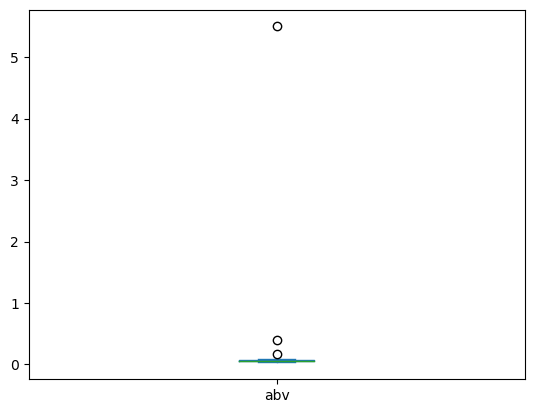

In [13]:
df.plot(kind='box', y='abv')

In [17]:
df['abv'].describe()

count    2190.000000
mean        0.060186
std         0.117010
min         0.032000
25%         0.050000
50%         0.055000
75%         0.065000
max         5.500000
Name: abv, dtype: float64

In [18]:
df['abv'].quantile(0.25)

0.05

In [19]:
df['abv'].quantile(0.75)

0.065

In [20]:
q1 = df['abv'].quantile(0.25)
q3 = df['abv'].quantile(0.75)
iqr = q3 - q1

In [23]:
condition = (df['abv'] < q1 - 1.5 * iqr) | (df['abv'] > q3 + 1.5 * iqr)

In [24]:
df[condition]

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
963,963,0.172,NaN,3691,Chamisul Fresh,Soju,993,12.17
1856,1856,0.400,NaN,3012,Grey Goose,Vodka,893,25.26
2250,2250,5.500,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.00


In [32]:
df.loc[2250, 'abv'] = 0.055

In [33]:
df.loc[2250]

Unnamed: 0                       2250
abv                             0.055
ibu                              40.0
id                                145
name              Silverback Pale Ale
style         American Pale Ale (APA)
brewery_id                        424
ounces                           12.0
abc                             0.055
bbv                             0.055
Name: 2250, dtype: object

In [34]:
condition = (df['abv'] < q1 - 1.5 * iqr) | (df['abv'] > q3 + 1.5 * iqr)
df[condition]

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces,abc,bbv
963,963,0.172,NaN,3691,Chamisul Fresh,Soju,993,12.17,NaN,NaN
1856,1856,0.400,NaN,3012,Grey Goose,Vodka,893,25.26,NaN,NaN


In [35]:
df[condition].index

Index([963, 1856], dtype='int64')

In [36]:
df.drop(df[condition].index, inplace=True)

In [37]:
condition = (df['abv'] < q1 - 1.5 * iqr) | (df['abv'] > q3 + 1.5 * iqr)
df[condition]

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces,abc,bbv


<Axes: >

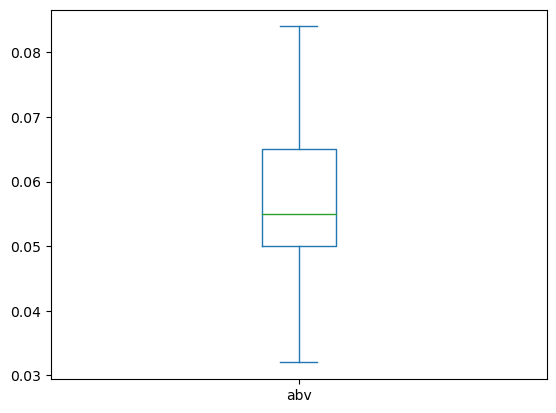

In [38]:
df.plot(kind='box', y='abv')